In [1]:
import numpy as np
import pandas as pd

## Change to online datasets


In [2]:
file_train = 'C:\\Data Sources\\Scania Failure Data\\aps_failure_training_set.csv'
#url_train = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00421/aps_failure_training_set.csv'

In [3]:
file_test = 'C:\\Data Sources\\Scania Failure Data\\aps_failure_test_set.csv'
#url_test = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00421/aps_failure_test_set.csv'

In [4]:
data_training = pd.read_csv(file_train, na_values='na')
data_testing = pd.read_csv(file_test, na_values='na')

In [5]:
# The columns are anonymized for proprietary reasons, which presents some challenges
# Any missing values were converted to NaN during the import
# The 'class' column is the failures, 'neg' representing negative failure, and 'pos' being positive failure
data_testing.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


### Exploratory data analysis

In [6]:
data_training.dtypes

class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object

In [7]:
# The training data contains 171 columns in numeric format, and
# one 'class' object column which contains our failure results
data_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


In [8]:
data_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 20.9+ MB


In [9]:
# There are columns missing large amounts of data
data_training.isnull().sum().sort_values(ascending=False)

br_000    49264
bq_000    48722
bp_000    47740
bo_000    46333
cr_000    46329
          ...  
cj_000      338
ck_000      338
bt_000      167
aa_000        0
class         0
Length: 171, dtype: int64

In [10]:
data_testing.isnull().sum().sort_values(ascending=False)

br_000    13129
bq_000    12981
bp_000    12721
bo_000    12376
cr_000    12363
          ...  
cj_000       86
ck_000       86
bt_000       28
aa_000        0
class         0
Length: 171, dtype: int64

In [11]:
number_of_failures  = data_training[data_training['class'] == 'pos' ].shape[0]
number_of_failures

1000

In [12]:
import matplotlib.pyplot as plt

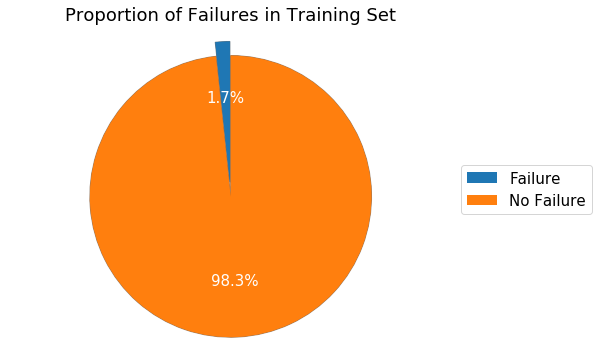

In [13]:
#Proportion of total failures
plt.rcParams['font.size'] = 15.0
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Failure', 'No Failure'

#
sizes = [number_of_failures, len(data_training)-number_of_failures]
explode = (0, 50)  

fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90, radius = 500, textprops=dict(color="w"))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.



ax1.legend(labels,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))



ax1.set_title("Proportion of Failures in Training Set")

plt.show()

In [14]:
# Set up variables for training and testing
# No need for train_test_split, as data is already split
X_train = data_training.drop(['class'], axis = 1)
y_train = data_training['class']

In [15]:
X_test = data_testing.drop(['class'], axis = 1)
y_test = data_testing['class']


In [16]:
y_train.shape

(60000,)

In [17]:
y_test.shape

(16000,)

In [18]:
y_test.head()

0    neg
1    neg
2    neg
3    neg
4    neg
Name: class, dtype: object

In [19]:
# Since our target is in string format ('pos' and 'neg')
# we will use label_encoder to convert it to a usable format

from sklearn.preprocessing import LabelEncoder 

In [20]:
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y_train)
#New variable for encoded target
label_encoded_y_train = label_encoder.transform(y_train)

In [21]:
label_encoded_y_test = label_encoder.transform(y_test)

In [22]:
# New encoded target
label_encoded_y_test[0:5]

array([0, 0, 0, 0, 0])

In [23]:
# For this classification we will use XGBoost
# XGBoost can internally handle missing values, and in this case we
# have columns with much missing data. 

In [24]:
import xgboost

In [25]:
model_xg = xgboost.XGBClassifier()

In [26]:
model_xg.fit(X_train, label_encoded_y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [27]:
# Predictions using the test set

predictions = model_xg.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
# Checking accuracy of the model

accuracy = accuracy_score(label_encoded_y_test, predictions)
accuracy

0.991375

In [30]:
# A 99.14% accuracy score. Let's now convert this to a dollar cost
# using Scania's metric

#### Cost-metric of miss-classification:

 
     Cost_1 refers to the cost that an unnecessary 
     check needs to be done by a technician at a facility, while 
     Cost_2 refer to the cost of missing a faulty truck, 
     which may cause a breakdown.



#####      Total_cost = (Cost_1 * No. of Instances) + (Cost_2 * No. of Instances)

In [38]:
# Function for quickly converting predictions to dollar costs

def costs(predictions, y_test):
     
    cost1 = 0  # $10 
    cost2 = 0  # $500
    
    for i in np.arange(0, len(predictions)):
        
        if (predictions[i]==0) and (y_test[i]==1):
            cost2 += 1
        
        if ( predictions[i] == 1 ) and ( y_test[i] == 0 ):
            cost1 += 1
    
    total_cost = cost1*10 + cost2*500
    
    
    print('Xgboost results:')
    print('Cost1: ', cost1 )
    print('Cost2: ', cost2)
    print('Total Predicted Failures: ', cost1)
    print('Total: ${:,.2f}'.format(total_cost))
    

In [39]:
costs(predictions, label_encoded_y_test)

138
Xgboost results:
Cost1:  19
Cost2:  119
Total Predicted Failures:  19
Total: $59,690.00


In [ ]:
#Actual failures in test set?

In [ ]:
# Plotting the feature importance

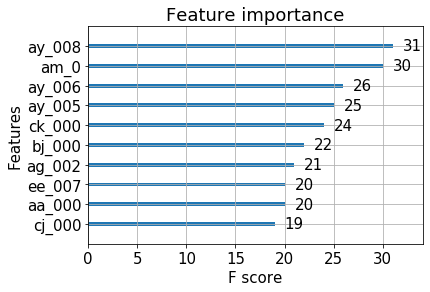

In [40]:
xgboost.plot_importance(model_xg, max_num_features=10, importance_type='weight')
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()